In [1]:
import pandas as pd
from IPython.display import display, HTML
from lr.text_processing.util import pre_process_nli_df
from lr.training.util import filter_df_by_label
from lr.text_processing.transformations.wordnet import path_base_transformation
from lr.text_processing.transformations.wordnet import path_base_transformation_p
from lr.text_processing.transformations.wordnet import path_base_transformation_h
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_path = "data/snli/train.csv" 
transformed_path = "data/snli/train_p_h_syn_noun.csv"

df = pd.read_csv(original_path)
df = filter_df_by_label(df.dropna()).reset_index(drop=True)
pre_process_nli_df(df)

df_t = path_base_transformation_h(df, transformed_path)

n = 518 | e_n = 6.0%


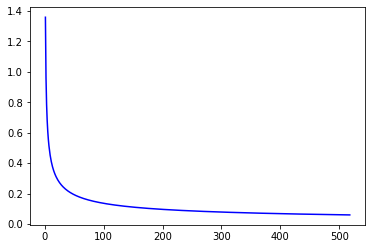

In [3]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

e95 = lambda n: e(0.05, n)
x = np.array(range(1,519))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e_id = eps[n]


print("n = {} | e_n = {:.1%}".format(x[n], e_id))

In [4]:
samples = 500
good = []
bad = []
count = 0

for _ in range(samples):
    count += 1
    original = df.sample()
    id_ = original.index[0]
    print("\noriginal\n")
    display(HTML(original.to_html()))
    modified = df_t.loc[id_].to_frame().transpose()
    print()
    print("\nmodified\n")
    display(HTML(modified.to_html()))
    print("\ndecide\n")
    decision = input()
    if decision == "y":
        good.append(id_)
    elif decision =="n":
        bad.append(id_)
    else:
        break


original



,premise,hypothesis,label
109501,two women sitting under a tent one with shirt redhair dark clothes drinking and the other laying down playing the guitar in a green top and jean peddle pushers both barefoot,a woman is playing a guitar,entailment




modified



,premise,hypothesis,label
109501,two women sitting under a tent one with shirt redhair dark clothes drinking and the other laying down playing the guitar in a green top and jean peddle pushers both barefoot,a adult female is playing a guitar,entailment



decide



 y



original



,premise,hypothesis,label
472577,a mountaineer is following a rope through a snowy trail,a man is following a rope looking for his home,neutral




modified



,premise,hypothesis,label
472577,a mountaineer is following a rope through a snowy trail,a adult male is following a rope looking for his place,neutral



decide



 y



original



,premise,hypothesis,label
209761,the large dancer is slinging her hair around,the dancer has hair,entailment




modified



,premise,hypothesis,label
209761,the large dancer is slinging her hair around,the terpsichorean has hair,entailment



decide



 n



original



,premise,hypothesis,label
398252,a woman and a man hugging in the middle of the sidewalk,a sad woman and a man hugging in the middle of the sidewalk,neutral




modified



,premise,hypothesis,label
398252,a woman and a man hugging in the middle of the sidewalk,a sad adult female and a adult male hugging in the center of the pavement,neutral



decide



 y



original



,premise,hypothesis,label
335262,a white dog is jumping up at a jet of water,a mans pet is thirsty,neutral




modified



,premise,hypothesis,label
335262,a white dog is jumping up at a jet of water,a mans pet is thirsty,neutral



decide



 y



original



,premise,hypothesis,label
75095,a biker bikes through the woods,they are practicing for a race,neutral




modified



,premise,hypothesis,label
75095,a biker bikes through the woods,they are practicing for a race,neutral



decide



 y



original



,premise,hypothesis,label
254893,a woman with a red purse and a dark colored coat is walking along a city street while talking on a cellphone,a woman is going to her job and is talking on her phone,neutral




modified



,premise,hypothesis,label
254893,a woman with a red purse and a dark colored coat is walking along a city street while talking on a cellphone,a adult female is going to her line and is talking on her telephone,neutral



decide



 n



original



,premise,hypothesis,label
5274,a young lady being comforted by a man after she has seen something sad and it has made her cry,the woman is laughing,contradiction




modified



,premise,hypothesis,label
5274,a young lady being comforted by a man after she has seen something sad and it has made her cry,the adult female is laughing,contradiction



decide



 y



original



,premise,hypothesis,label
111346,a skateboarder in a red baseball cap black shirt and tan shorts skates alone in a wide open space,the skateboarder is by himself,entailment




modified



,premise,hypothesis,label
111346,a skateboarder in a red baseball cap black shirt and tan shorts skates alone in a wide open space,the skateboarder is by himself,entailment



decide



 y



original



,premise,hypothesis,label
391604,a man in a yellow helmet riding his bike on a trail through the woods,a man drinking tea,contradiction




modified



,premise,hypothesis,label
391604,a man in a yellow helmet riding his bike on a trail through the woods,a adult male drinking tea,contradiction



decide



 y



original



,premise,hypothesis,label
76151,four men two in hats and two with mustaches sit together by a fountain and large vents,the men are friends,neutral




modified



,premise,hypothesis,label
76151,four men two in hats and two with mustaches sit together by a fountain and large vents,the men are friends,neutral



decide



 y



original



,premise,hypothesis,label
487369,a little girl in a pink and white ski suit and red helmet skies sideways on the snow covered slope,it is winter and is cold outside,neutral




modified



,premise,hypothesis,label
487369,a little girl in a pink and white ski suit and red helmet skies sideways on the snow covered slope,it is wintertime and is common cold outside,neutral



decide



 n



original



,premise,hypothesis,label
81374,caucasian boy in blue striped shirt contemplates eating hotdog,a boy is holding a hotdog,neutral




modified



,premise,hypothesis,label
81374,caucasian boy in blue striped shirt contemplates eating hotdog,a male child is holding a hot dog,neutral



decide



 y



original



,premise,hypothesis,label
450117,cellist in a blue polo shirt prepares to perform outdoors,the cellist is part of the orchestra,neutral




modified



,premise,hypothesis,label
450117,cellist in a blue polo shirt prepares to perform outdoors,the violoncellist is portion of the orchestra,neutral



decide



 y



original



,premise,hypothesis,label
370325,a woman wearing jeans and black books smokes outside,a woman smokes,entailment




modified



,premise,hypothesis,label
370325,a woman wearing jeans and black books smokes outside,a adult female smokes,entailment



decide



 y



original



,premise,hypothesis,label
71705,some children are playing soccer on a sportsfield by the goal,children playing football,contradiction




modified



,premise,hypothesis,label
71705,some children are playing soccer on a sportsfield by the goal,child playing football game,contradiction



decide



 y



original



,premise,hypothesis,label
337170,a young woman works behind the counter at a juice bar,the woman is indoors,entailment




modified



,premise,hypothesis,label
337170,a young woman works behind the counter at a juice bar,the adult female is inside,entailment



decide



 y



original



,premise,hypothesis,label
254340,a young child in a red shirt is chewing a stem of grass and there is a horse in the background,a young child in red chewing on bubble gum watches tv,contradiction




modified



,premise,hypothesis,label
254340,a young child in a red shirt is chewing a stem of grass and there is a horse in the background,a young kid in red chewing on bubble chewing gum watches video,contradiction



decide



 y



original



,premise,hypothesis,label
279129,a blond caucasian female wearing a white business jacket pink blouse sitting at a table draped in hot pink tablecloth writing on a piece of paper,the woman is waiting for her client to come,neutral




modified



,premise,hypothesis,label
279129,a blond caucasian female wearing a white business jacket pink blouse sitting at a table draped in hot pink tablecloth writing on a piece of paper,the adult female is waiting for her client to come,neutral



decide



 y



original



,premise,hypothesis,label
326596,a young boy is underwater in a swimming pool,a boy is in a swimming pool,entailment




modified



,premise,hypothesis,label
326596,a young boy is underwater in a swimming pool,a male child is in a swimming pool,entailment



decide



 y



original



,premise,hypothesis,label
230015,a man wearing no shirt and reading a newspaper is standing in a park,the woman read the papers,contradiction




modified



,premise,hypothesis,label
230015,a man wearing no shirt and reading a newspaper is standing in a park,the adult female read the document,contradiction



decide



 y



original



,premise,hypothesis,label
393391,two bearded men and a woman,there are three people who are friends,neutral




modified



,premise,hypothesis,label
393391,two bearded men and a woman,there are three people who are friends,neutral



decide



 y



original



,premise,hypothesis,label
486595,a brown dog is running though a river,an animal running,entailment




modified



,premise,hypothesis,label
486595,a brown dog is running though a river,an creature running,entailment



decide



 y



original



,premise,hypothesis,label
57688,a bicyclist wearing a dark helmet and a blue jacket jumps over a mound in a field,a person is riding a bike,entailment




modified



,premise,hypothesis,label
57688,a bicyclist wearing a dark helmet and a blue jacket jumps over a mound in a field,a individual is riding a motorcycle,entailment



decide



 y



original



,premise,hypothesis,label
58779,two brown dogs playing in water,the dogs are having fun,neutral




modified



,premise,hypothesis,label
58779,two brown dogs playing in water,the dogs are having fun,neutral



decide



 y



original



,premise,hypothesis,label
334410,a man repairing a bicycle tire while his customer asks him questions,the man is sitting on the toilet and reading the newspaper,contradiction




modified



,premise,hypothesis,label
334410,a man repairing a bicycle tire while his customer asks him questions,the adult male is sitting on the bathroom and reading the paper,contradiction



decide



 y



original



,premise,hypothesis,label
492536,a man in a black polo shirt holds an infant in a white blanket,a man hold a baby,entailment




modified



,premise,hypothesis,label
492536,a man in a black polo shirt holds an infant in a white blanket,a adult male grip a infant,entailment



decide



 y



original



,premise,hypothesis,label
232166,a woman in a black bikini is wearing high heels,a woman is swimming at the beach,contradiction




modified



,premise,hypothesis,label
232166,a woman in a black bikini is wearing high heels,a adult female is swimming at the beach,contradiction



decide



 y



original



,premise,hypothesis,label
323899,a little girl in pink is crying while being held by a woman in a white coat,the girl is laughing,contradiction




modified



,premise,hypothesis,label
323899,a little girl in pink is crying while being held by a woman in a white coat,the girl is laughing,contradiction



decide



 y



original



,premise,hypothesis,label
433772,a furry tan dog is outside on a patio,the dog is eating from his dish in the kitchen,contradiction




modified



,premise,hypothesis,label
433772,a furry tan dog is outside on a patio,the domestic dog is eating from his dish in the kitchen,contradiction



decide



 y



original



,premise,hypothesis,label
36778,a musical band dressed in green shirt march outside,a musical band is marching outside,entailment




modified



,premise,hypothesis,label
36778,a musical band dressed in green shirt march outside,a musical comedy band is marching outside,entailment



decide



 n



original



,premise,hypothesis,label
269056,students attend a math lecture at university,the students are all seniors,neutral




modified



,premise,hypothesis,label
269056,students attend a math lecture at university,the students are all seniors,neutral



decide



 y



original



,premise,hypothesis,label
129168,two workers at a grocery store observing something out of camera range,the people are working,entailment




modified



,premise,hypothesis,label
129168,two workers at a grocery store observing something out of camera range,the people are working,entailment



decide



 y



original



,premise,hypothesis,label
265675,a shirtless man jumping off a large concrete structure into a river with his friends watching from the structure,people at an indoor gathering,contradiction




modified



,premise,hypothesis,label
265675,a shirtless man jumping off a large concrete structure into a river with his friends watching from the structure,people at an indoor gathering,contradiction



decide



 y



original



,premise,hypothesis,label
432047,an artist paints a picture of a large castle,a man is paid to pant a picture,neutral




modified



,premise,hypothesis,label
432047,an artist paints a picture of a large castle,a adult male is paid to pant a image,neutral



decide



 y



original



,premise,hypothesis,label
136127,the guards from buckingham dressed in red coats black pants and high fitting hats marching and playing instruments,the guards are lazily sitting around,contradiction




modified



,premise,hypothesis,label
136127,the guards from buckingham dressed in red coats black pants and high fitting hats marching and playing instruments,the guards are lazily sitting around,contradiction



decide



 h


## CI

In [8]:
n =  count-1
g = len(good) / n
print("count = {}\n".format(n))
print("len(good) = {}\n".format(len(good)))
print("good pct = {:.3f}\n".format(g))


count = 35

len(good) = 31

good pct = 0.886



In [9]:
all_ns = [83, 35]

all_good = [75, 31]

assert len(all_ns) == len(all_good)

n = np.sum(all_ns)
g = np.sum(all_good)
pct = g / n

l = pct - e95(n)
u = pct + e95(n) 

print("count = {}\n".format(n))
print("good pct = {:.1%}\n".format(pct))
print("e95 = {:.2%}\n".format(e95(n)))
print("good 95% pct CI = ({:.1%}, {:.1%})\n".format(l,u))


count = 118

good pct = 89.8%

e95 = 12.50%

good 95% pct CI = (77.3%, 102.3%)



## gathering results

In [10]:
dict_ = {"data": ["SNLI", "SNLI", "SNLI"],
         "transformation": ["Wordnet Syn Sub P and H", "Wordnet Syn Sub P only", "Wordnet Syn Sub H only"],
         "acceptance": ["82.2%", "85.0%", "{:.1%}".format(pct)],
         "lower": ["75.5%", "78.2%", "{:.1%}".format(l)],
         "upper":["89.5%", "91.8%", "{:.1%}".format(u)],
         "sample size":[400, 400, n],
         "ok observations":[329, 340, g]}



results = pd.DataFrame(dict_)
results

,data,transformation,acceptance,lower,upper,sample size,ok observations
0,SNLI,Wordnet Syn Sub P and H,82.2%,75.5%,89.5%,400,329
1,SNLI,Wordnet Syn Sub P only,85.0%,78.2%,91.8%,400,340
2,SNLI,Wordnet Syn Sub H only,89.8%,77.3%,102.3%,118,106
